In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import sklearn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
import math
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook 
import numpy as np
import pandas as pd
from itertools import product
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings ('ignore')

In [131]:
amd = pd.read_csv('C:\\Users\\chand\\Downloads\\Share price estimation of TOP 5 GPU Companies\\Dataset\\AMD (2023 - 08.04.2024).csv')
asus = pd.read_csv('C:\\Users\\chand\\Downloads\\Share price estimation of TOP 5 GPU Companies\\Dataset\\ASUS (2023 - 08.04.2024).csv')
intel = pd.read_csv('C:\\Users\\chand\\Downloads\\Share price estimation of TOP 5 GPU Companies\\Dataset\\Intel (2023 - 08.04.2024).csv')
msi = pd.read_csv('C:\\Users\\chand\\Downloads\\Share price estimation of TOP 5 GPU Companies\\Dataset\\MSI (2023 - 08.04.2024).csv')
nvidia = pd.read_csv('C:\\Users\\chand\\Downloads\\Share price estimation of TOP 5 GPU Companies\\Dataset\\MSI (2023 - 08.04.2024).csv')

In [132]:
amd.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,66.000000,66.879997,63.590000,64.019997,64.019997,46851800
1,04-01-2023,65.000000,65.790001,63.310001,64.660004,64.660004,47477100
2,05-01-2023,64.150002,64.349998,62.299999,62.330002,62.330002,46159500
3,06-01-2023,63.150002,64.300003,60.049999,63.959999,63.959999,70161300
4,09-01-2023,66.220001,69.320000,65.669998,67.239998,67.239998,69741300


In [133]:
asus.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,267.0,271.0,266.0,270.0,257.040009,1049876
1,04-01-2023,271.5,271.5,268.5,268.5,255.612000,749417
2,05-01-2023,271.0,275.0,271.0,271.0,257.992004,1159580
3,06-01-2023,272.0,273.0,270.0,271.5,258.468018,625059
4,09-01-2023,273.5,275.5,272.5,275.0,261.800018,1470961


In [134]:
intel.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,27.049999,27.070000,26.370001,26.730000,26.044008,31308000
1,04-01-2023,27.410000,27.920000,27.160000,27.680000,26.969627,37665200
2,05-01-2023,27.440001,27.780001,27.379999,27.559999,26.852709,33552600
3,06-01-2023,27.930000,28.830000,27.379999,28.730000,27.992682,31788600
4,09-01-2023,28.840000,29.870001,28.840000,29.309999,28.557795,37493200


In [135]:
msi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,119.0,122.5,119.0,122.5,117.785713,1688380
1,04-01-2023,122.5,122.5,121.0,122.0,117.304955,1214832
2,05-01-2023,123.0,124.0,122.5,123.5,118.747231,2223376
3,06-01-2023,123.5,124.5,123.0,124.0,119.227989,915155
4,09-01-2023,125.0,126.0,124.5,126.0,121.151016,2305489


In [136]:
nvidia.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,119.0,122.5,119.0,122.5,117.785713,1688380
1,04-01-2023,122.5,122.5,121.0,122.0,117.304955,1214832
2,05-01-2023,123.0,124.0,122.5,123.5,118.747231,2223376
3,06-01-2023,123.5,124.5,123.0,124.0,119.227989,915155
4,09-01-2023,125.0,126.0,124.5,126.0,121.151016,2305489


In [137]:
amd.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [138]:
asus.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [139]:
intel.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [140]:
msi.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [141]:
nvidia.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [142]:
asus = asus.dropna()

In [149]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [159]:
import numpy as np
try:
    result = str(type(np.int64(df['Date'][0].timestamp())))[8:-2]
except KeyError:
    result = "Column 'Date' not found"

print(result)


numpy.int64


In [160]:
data_list = [amd, asus, intel, msi, nvidia]
for data in data_list:
    data['Date'] = pd.to_datetime(data['Date'])


In [161]:
data_list = [amd,asus,intel,msi,nvidia]
names = [0,1,2,3,4]
index = 0
for data in data_list:
    dates = data['Date']
    data['company'] = np.repeat(names[index],len(data))
    data['year'] = dates.dt.year
    data['Month'] = dates.dt.month
    data['Day'] = dates.dt.day
    index=1

In [162]:
data_list = [amd,asus,intel,msi,nvidia]
test_data = []
train_data = []
for data in data_list:
    train = data[:int(0.8*len(data))] 
    test = data[int(0.8*len(data)):]
    train_data.append(train) 
    test_data.append(test) 
    print(test.shape, train.shape)


(64, 11) (252, 11)
(60, 11) (238, 11)
(64, 11) (252, 11)
(60, 11) (238, 11)
(60, 11) (238, 11)


In [163]:
train_data = pd.concat(train_data)
test_data = pd.concat(test_data)
print(train_data.shape)
print(test_data.shape)

(1218, 11)
(308, 11)


In [164]:
x_train = train_data[['Open', 'High', 'Low', 'Volume', 'Month', 'Day']] 
x_test = test_data[['Open', 'High', 'Low', 'Volume', 'Month', 'Day']]
y_train = train_data['Close']
y_test = test_data['Close']

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1218, 6)
(308, 6)
(1218,)
(308,)


In [165]:
amd.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,company,year,Month,Day
count,316,316.000000,316.000000,316.000000,316.000000,316.000000,3.160000e+02,316.0,316.000000,316.000000,316.000000
mean,2023-08-19 13:44:48.607595008,117.834431,120.205950,115.606930,118.037500,118.037500,6.485599e+07,0.0,2023.208861,5.617089,15.566456
min,2023-01-03 00:00:00,63.150002,64.300003,60.049999,62.330002,62.330002,1.900100e+07,0.0,2023.000000,1.000000,1.000000
25%,2023-04-26 18:00:00,96.042498,97.015001,93.592499,95.952499,95.952499,4.932745e+07,0.0,2023.000000,2.000000,8.000000
50%,2023-08-19 12:00:00,109.355000,111.709999,107.419998,110.049999,110.049999,5.814785e+07,0.0,2023.000000,5.000000,15.000000
75%,2023-12-11 06:00:00,132.267502,135.637493,129.162498,134.637505,134.637505,7.321072e+07,0.0,2023.000000,9.000000,23.000000
max,2024-04-05 00:00:00,213.410004,227.300003,208.220001,211.380005,211.380005,1.733720e+08,0.0,2024.000000,12.000000,31.000000
std,NaN,34.336809,34.976653,33.419452,34.192046,34.192046,2.285617e+07,0.0,0.407139,3.561999,8.828814


In [166]:
asus.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,company,year,Month,Day
count,298,298.000000,298.000000,298.000000,298.000000,298.000000,2.980000e+02,298.0,298.000000,298.000000,298.000000
mean,2023-08-22 00:38:39.463087360,355.791946,359.994966,350.947987,355.354027,350.087560,4.374329e+06,1.0,2023.197987,5.825503,15.694631
min,2023-01-03 00:00:00,260.500000,264.000000,260.500000,261.000000,248.472000,5.541680e+05,1.0,2023.000000,1.000000,1.000000
25%,2023-05-05 18:00:00,289.000000,291.500000,286.500000,289.125000,275.247017,1.812484e+06,1.0,2023.000000,3.000000,8.000000
50%,2023-08-22 12:00:00,359.500000,362.000000,352.750000,358.750000,358.750000,2.895180e+06,1.0,2023.000000,5.000000,16.000000
75%,2023-12-07 18:00:00,408.750000,414.500000,399.750000,405.750000,405.750000,4.777478e+06,1.0,2023.000000,9.000000,23.000000
max,2024-04-03 00:00:00,496.000000,502.000000,487.000000,492.000000,492.000000,3.714302e+07,1.0,2024.000000,12.000000,31.000000
std,NaN,67.528273,69.320712,65.706468,67.248907,72.668458,4.552216e+06,0.0,0.399152,3.565135,8.771167


In [167]:
intel.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,company,year,Month,Day
count,316,316.000000,316.000000,316.000000,316.000000,316.000000,3.160000e+02,316.0,316.000000,316.000000,316.000000
mean,2023-08-19 13:44:48.607595008,35.962753,36.527627,35.464620,36.018734,35.753017,4.271793e+07,1.0,2023.208861,5.617089,15.566456
min,2023-01-03 00:00:00,24.940001,25.120001,24.730000,24.900000,24.556589,1.303710e+07,1.0,2023.000000,1.000000,1.000000
25%,2023-04-26 18:00:00,30.262501,30.960000,29.797499,30.297500,29.863195,3.059598e+07,1.0,2023.000000,2.000000,8.000000
50%,2023-08-19 12:00:00,34.545000,35.070000,34.135000,34.600001,34.385813,3.782010e+07,1.0,2023.000000,5.000000,15.000000
75%,2023-12-11 06:00:00,42.554999,43.142500,42.184999,42.655000,42.591405,5.050840e+07,1.0,2023.000000,9.000000,23.000000
max,2024-04-05 00:00:00,50.810001,51.279999,50.189999,50.759998,50.611649,1.485482e+08,1.0,2024.000000,12.000000,31.000000
std,NaN,6.544869,6.584915,6.455616,6.522785,6.662666,1.785658e+07,0.0,0.407139,3.561999,8.828814


In [168]:
msi.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,company,year,Month,Day
count,298,298.00000,298.000000,298.000000,298.000000,298.000000,2.980000e+02,298.0,298.000000,298.000000,298.000000
mean,2023-08-22 00:38:39.463087360,166.42953,168.577181,164.082215,166.268456,163.188253,4.573212e+06,1.0,2023.197987,5.825503,15.694631
min,2023-01-03 00:00:00,119.00000,122.500000,119.000000,122.000000,117.304955,6.278910e+05,1.0,2023.000000,1.000000,1.000000
25%,2023-05-05 18:00:00,146.00000,147.125000,145.000000,146.500000,140.862091,2.619778e+06,1.0,2023.000000,3.000000,8.000000
50%,2023-08-22 12:00:00,170.00000,171.500000,168.000000,169.500000,167.750000,3.930778e+06,1.0,2023.000000,5.000000,16.000000
75%,2023-12-07 18:00:00,181.87500,184.000000,179.000000,181.500000,179.375000,5.518807e+06,1.0,2023.000000,9.000000,23.000000
max,2024-04-03 00:00:00,216.00000,216.500000,202.000000,211.000000,204.000000,2.313684e+07,1.0,2024.000000,12.000000,31.000000
std,NaN,20.22837,20.714162,19.507077,19.874694,21.059304,2.988958e+06,0.0,0.399152,3.565135,8.771167


In [169]:
nvidia.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume,company,year,Month,Day
count,298,298.00000,298.000000,298.000000,298.000000,298.000000,2.980000e+02,298.0,298.000000,298.000000,298.000000
mean,2023-08-22 00:38:39.463087360,166.42953,168.577181,164.082215,166.268456,163.188253,4.573212e+06,1.0,2023.197987,5.825503,15.694631
min,2023-01-03 00:00:00,119.00000,122.500000,119.000000,122.000000,117.304955,6.278910e+05,1.0,2023.000000,1.000000,1.000000
25%,2023-05-05 18:00:00,146.00000,147.125000,145.000000,146.500000,140.862091,2.619778e+06,1.0,2023.000000,3.000000,8.000000
50%,2023-08-22 12:00:00,170.00000,171.500000,168.000000,169.500000,167.750000,3.930778e+06,1.0,2023.000000,5.000000,16.000000
75%,2023-12-07 18:00:00,181.87500,184.000000,179.000000,181.500000,179.375000,5.518807e+06,1.0,2023.000000,9.000000,23.000000
max,2024-04-03 00:00:00,216.00000,216.500000,202.000000,211.000000,204.000000,2.313684e+07,1.0,2024.000000,12.000000,31.000000
std,NaN,20.22837,20.714162,19.507077,19.874694,21.059304,2.988958e+06,0.0,0.399152,3.565135,8.771167


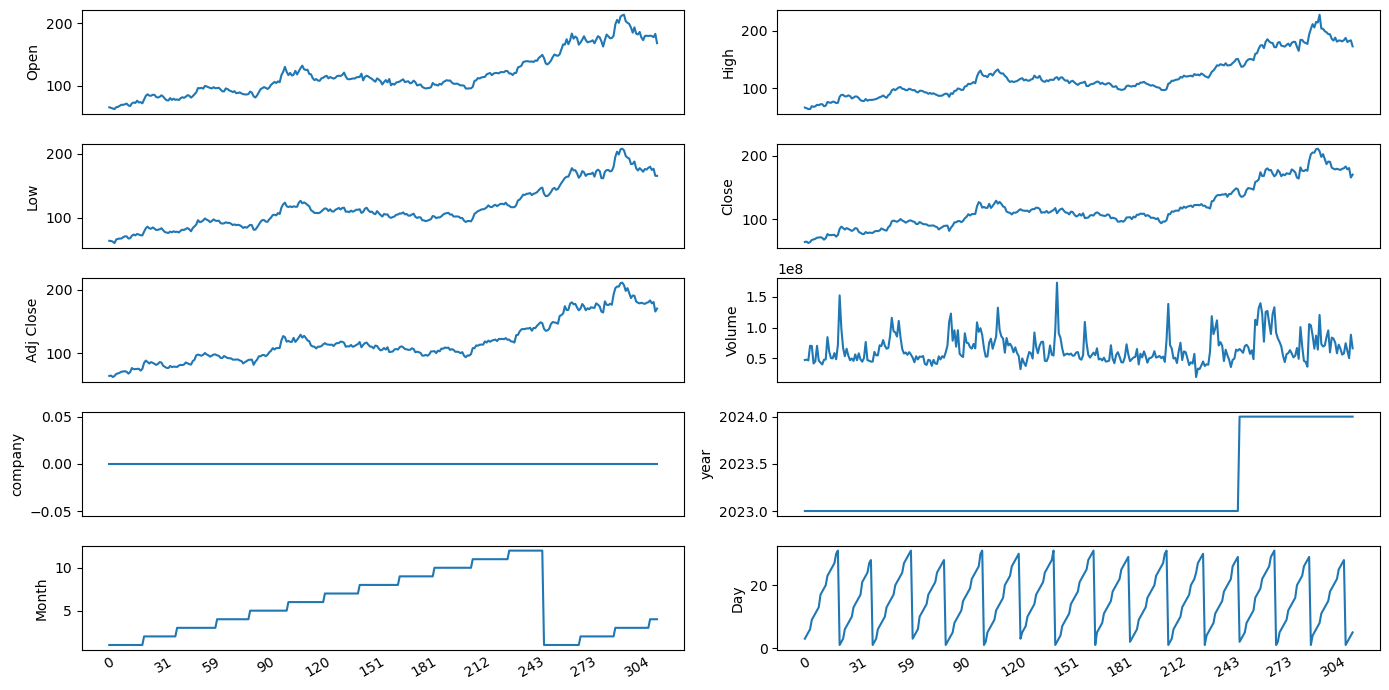

In [170]:
import matplotlib.dates as mdates
df_plot = amd.drop(columns=['Date'])
ncols = 2
nrows = int (round (df_plot.shape[1] / ncols, 0))

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate (fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params (axis="x", rotation=30, labelsize=10, length=0) 
        ax.xaxis.set_major_locator (mdates. AutoDateLocator())
fig.tight_layout()
plt.show()

In [171]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [172]:
print('Test score:',lr.score(x_test,y_test))
print('Train score:',lr.score(x_train,y_train))

Test score: 0.9997528085043464
Train score: 0.9998004821962657


In [173]:
y_pred = lr.predict(x_test)
print('r2_score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score: 0.9997528085043464
MAE: 1.415430241089488


In [174]:
from sklearn.tree import DecisionTreeRegressor

In [175]:
dt = DecisionTreeRegressor() 
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [176]:
print('Test score:',dt.score(x_test,y_test)) 
print('Train score:',dt.score(x_train,y_train))

Test score: 0.9979491879518755
Train score: 1.0


In [177]:
y_pred = dt.predict(x_test)
print('r2_score: ',r2_score (y_test,y_pred)) 
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score:  0.9979491879518755
MAE: 3.4545780324675324


In [178]:
from sklearn.tree import ExtraTreeRegressor
etr = ExtraTreeRegressor()
etr.fit(x_train,y_train)

ExtraTreeRegressor()

In [179]:
print('Test score:',etr.score (x_test,y_test))
print('Train score:',etr.score (x_train,y_train))

Test score: 0.9980564665520452
Train score: 1.0


In [180]:
y_pred = etr.predict(x_test)
print('r2_score:', r2_score (y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

r2_score: 0.9980564665520452
MAE: 3.4693181883116884


In [181]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [182]:
print('Test score:',rf.score (x_test,y_test)) 
print('Train score:',rf.score (x_train,y_train))

Test score: 0.9993884055629801
Train score: 0.999949142401681


In [233]:
y_pred = rf.predict(x_test)
print('r2_score:', r2_score (y_test,y_pred)) 
print('MAE:', mean_absolute_error (y_test,y_pred))

r2_score: 0.9993884055629801
MAE: 1.9873239624350627


In [232]:
amd_dates = test_data[test_data['company']==0]['Date']
amd_pred = lr.predict(x_test[test_data['company']==0])
amd_orig = test_data[test_data['company'] ==0]['Close']

asus_dates = test_data[test_data['company']==1]['Date']
asus_pred = lr.predict(x_test[test_data['company']==1])
asus_orig = test_data[test_data['company']==1]['Close']

intel_dates =test_data[test_data['company']==2]['Date']
intel_pred = lr.predict(x_test[test_data['company']==2])
intel_orig = test_data[test_data['company'] ==2]['Close']

msi_dates = test_data[test_data['company'] ==3]['Date']
msi_pred = lr.predict(x_test[test_data['company']==3])
msi_orig = test_data[test_data['company']==3]['Close']

nvidia_dates = test_data[test_data['company']==4]['Date']
nvidia_pred = lr.predict(x_test[x_test['company']==4])
nvidia_orig =test_data[test_data['company'] ==4]['Close']


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by LinearRegression.

In [209]:
import pickle as pkl

In [210]:
pkl.dump(lr,open('lr.pkl','wb'))